In [2]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv(r'C:\Users\utw09\Desktop\정노을\본캠 프로젝트\세번째 팀\US_Ecommerce_2020.csv', encoding='cp1252')

# 데이터프레임 출력
df.head(3)

# type("Order Date")

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280


In [3]:
# 'Order Date' 칼럼을 날짜 형식으로 변환
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d')

# 'yyyy-mm-dd' 형식으로 칼럼 값을 변경
df['Order Date'] = df['Order Date'].dt.strftime('%Y-%m-%d')

# 변경된 데이터프레임 출력
print(df)
# df.head(3)
# type("Order Date")

ValueError: time data "01-01-20" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# # Customer ID 열을 기준으로 오름차순 정렬
# df_sorted = df.sort_values(by='Category')

# # 정렬된 데이터프레임 출력
# df_sorted.head(3)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
848,2020-05-18,8184,CA-2017-155642,Standard Class,BM-11575,Corporate,United States,Chicago,Illinois,60653,Central,FUR-FU-10001918,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder Wi...,1.892,1,0.6,-0.9933
2468,2020-11-05,9468,CA-2017-102925,Second Class,CD-12280,Consumer,United States,New York City,New York,10024,East,FUR-TA-10003469,Furniture,Tables,Balt Split Level Computer Training Table,166.500,2,0.4,-66.6000


In [ ]:
# #Category 별로 count
# category_sales_count = df['Category'].value_counts()
# category_sales_count

Category
Office Supplies    2002
Furniture           686
Technology          624
Name: count, dtype: int64

In [ ]:
# #Sub-Category 별로 count
# sub_category_sales_count = df['Sub-Category'].value_counts()
# sub_category_sales_count

Sub-Category
Binders        500
Paper          459
Furnishings    316
Phones         294
Storage        288
Art            282
Accessories    275
Chairs         190
Appliances     165
Labels         114
Tables         104
Bookcases       76
Envelopes       71
Fasteners       64
Supplies        59
Machines        33
Copiers         22
Name: count, dtype: int64

In [4]:
#Segment 별로 count
segmrnt_count = df['Segment'].value_counts()
segmrnt_count

Segment
Consumer       1668
Corporate       980
Home Office     664
Name: count, dtype: int64

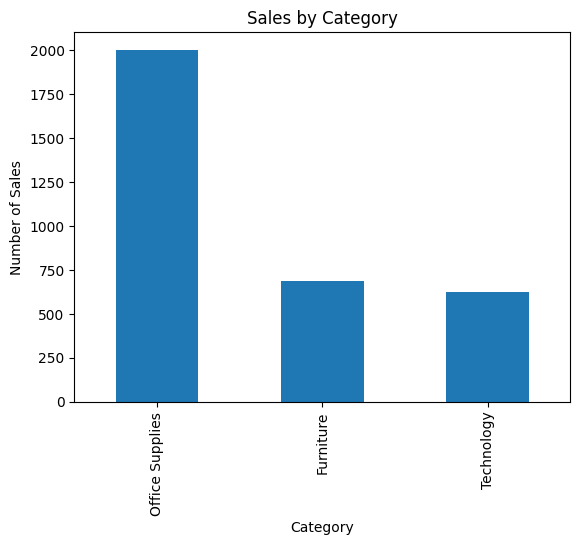

In [7]:
# import matplotlib.pyplot as plt

# # Category 별 언급된 횟수 count
# category_sales_count = df['Category'].value_counts()

# # 바 그래프 그리기
# category_sales_count.plot(kind='bar')

# # 그래프 제목과 축 이름 설정
# plt.title('Sales by Category')
# plt.xlabel('Category')
# plt.ylabel('Number of Sales')

# # 그래프 출력
# plt.show()

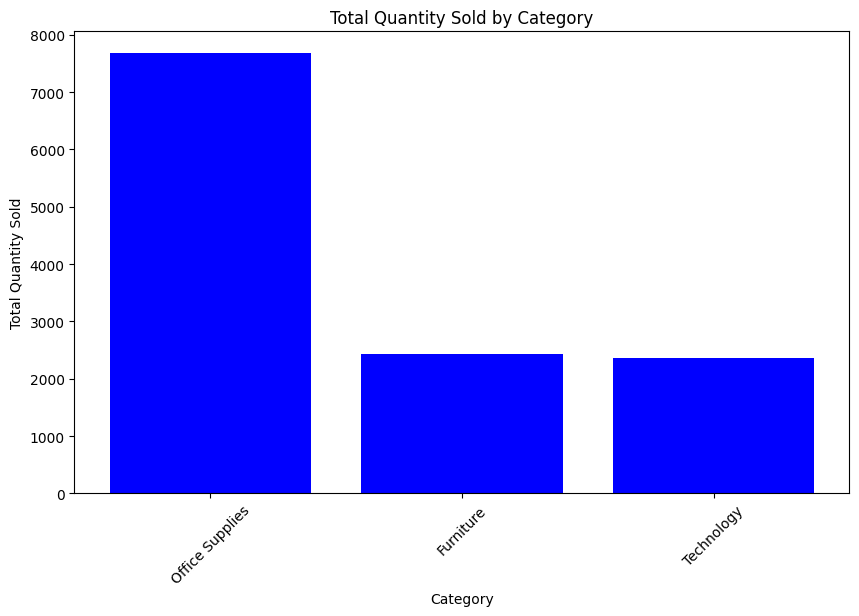

In [54]:
# 각 카테고리에서의 총 판매량 계산
category_sales = df.groupby('Category')['Quantity'].sum().reset_index()
# category_sales
# Quantity를 기준으로 데이터 정렬
# category_sales_sorted = category_sales.sort_values()
category_sales = category_sales.sort_values(by='Quantity', ascending=False)
# category_sales
# 시각화
plt.figure(figsize=(10, 6))
plt.bar(category_sales['Category'], category_sales['Quantity'], color='blue')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by Category')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

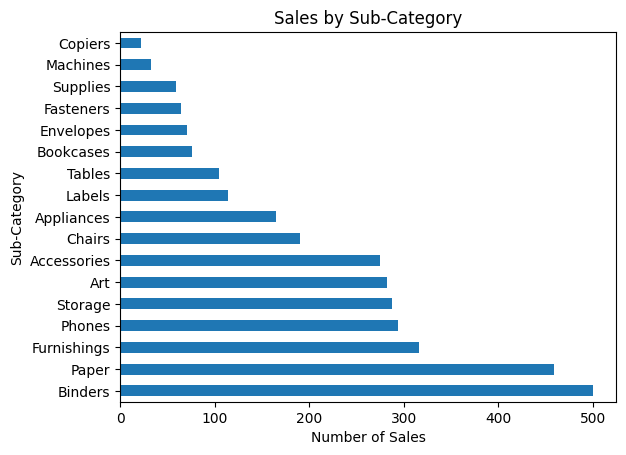

In [ ]:
# import matplotlib.pyplot as plt

# # Sub-Category 별 언급된 횟수 count
# sub_category_sales_count = df['Sub-Category'].value_counts()

# # 바 그래프 축 바꿔서 그리기
# sub_category_sales_count.plot(kind='barh')

# # 그래프 제목과 축 이름 설정
# plt.title('Sales by Sub-Category')
# plt.ylabel('Sub-Category')
# plt.xlabel('Number of Sales')

# # 그래프 출력
# plt.show()

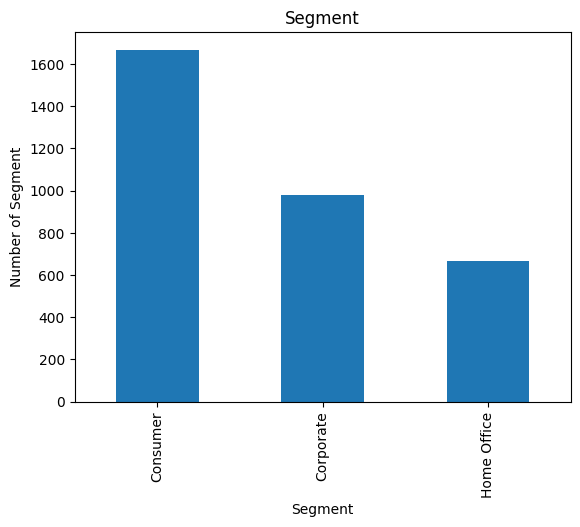

In [8]:
# Segment 별 구매 횟수 count
segmrnt_count = df['Segment'].value_counts()

# 바 그래프 그리기
segmrnt_count.plot(kind='bar')

# 그래프 제목과 축 이름 설정
plt.title('Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Segment')

# 그래프 출력
plt.show()

In [9]:
# Sub-Category 별로 Quantity 합계 계산
# Sub-Category 별로 판매 수량 확인
sub_category_quantity = df.groupby('Sub-Category')['Quantity'].sum()

# 결과 출력
print(sub_category_quantity)

Sub-Category
Accessories    1079
Appliances      654
Art            1101
Binders        2067
Bookcases       276
Chairs          674
Copiers          73
Envelopes       241
Fasteners       249
Furnishings    1097
Labels          448
Machines        121
Paper          1702
Phones         1090
Storage        1022
Supplies        192
Tables          390
Name: Quantity, dtype: int64


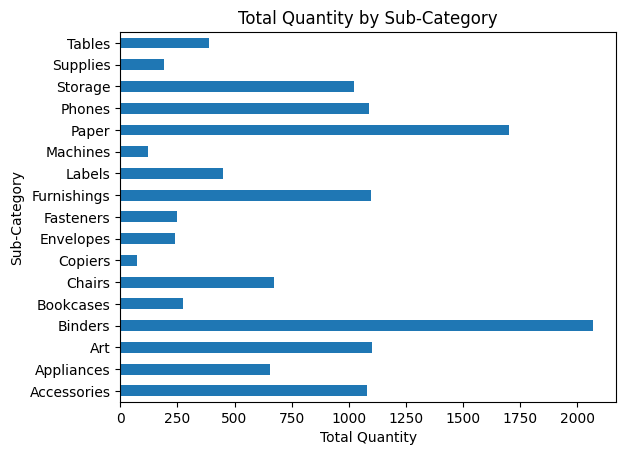

In [10]:
# Quantity를 기준으로 데이터 정렬
sub_category_quantity_sorted = sub_category_quantity.sort_values(ascending=False)

# Sub-Category 별로 Quantity 합계 막대 그래프 그리기
# Sub-Category 별로 판매 수량 확인
sub_category_quantity.plot(kind='barh')

# 그래프 제목과 축 이름 설정
plt.title('Total Quantity by Sub-Category')
plt.ylabel('Sub-Category')
plt.xlabel('Total Quantity')

# 그래프 출력
plt.show()

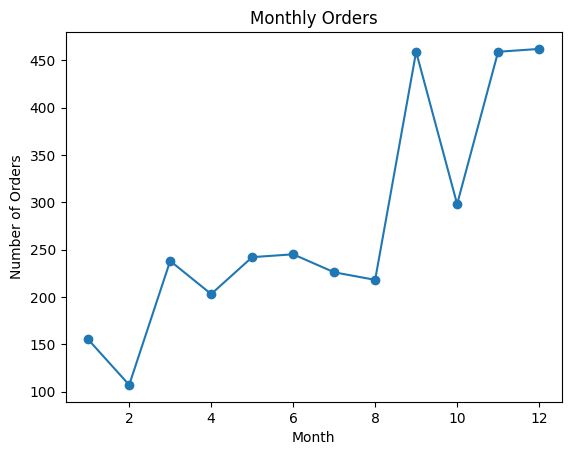

In [ ]:
# #월별 판매 분석
#  # 'Order Date' 열을 datetime 형식으로 변환
# df['Order Date'] = pd.to_datetime(df['Order Date']) 

# monthly_orders = df.groupby(df['Order Date'].dt.month)['Order ID'].count()

#  # 월별 주문 수를 선 그래프로 표현
# monthly_orders.plot(kind='line', marker='o') 

# plt.title('Monthly Orders')
# plt.xlabel('Month')
# plt.ylabel('Number of Orders')

# plt.show()

In [ ]:
# #Sub-Category 별 구매 주기
# import pandas as pd

# # 'Order Date' 열을 datetime 형식으로 변환
# df['Order Date'] = pd.to_datetime(df['Order Date'])

# # Sub-Category 별로 구매 주기를 계산하기 위한 함수 정의
# def calculate_purchase_cycle(sub_category):
#     # 해당 Sub-Category에 해당하는 주문들을 선택
#     sub_category_orders = df[df['Sub-Category'] == sub_category].sort_values(by='Order Date')
    
#     # 주문 간의 날짜 간격 계산
#     order_intervals = sub_category_orders['Order Date'].diff().dt.days
    
#     # 주문 간격의 평균 계산
#     average_purchase_cycle = order_intervals.mean()
    
#     return average_purchase_cycle

# # 각 Sub-Category 별로 구매 주기 계산
# sub_category_purchase_cycles = {}
# for sub_category in df['Sub-Category'].unique():
#     sub_category_purchase_cycles[sub_category] = calculate_purchase_cycle(sub_category)

# # 결과 출력
# for sub_category, purchase_cycle in sub_category_purchase_cycles.items():
#     print(f"Sub-Category: {sub_category}, Average Purchase Cycle: {purchase_cycle} days")


Sub-Category: Furnishings, Average Purchase Cycle: 1.1523809523809523 days
Sub-Category: Binders, Average Purchase Cycle: 0.7294589178356713 days
Sub-Category: Storage, Average Purchase Cycle: 1.2613240418118468 days
Sub-Category: Chairs, Average Purchase Cycle: 1.9206349206349207 days
Sub-Category: Art, Average Purchase Cycle: 1.291814946619217 days
Sub-Category: Appliances, Average Purchase Cycle: 2.2195121951219514 days
Sub-Category: Machines, Average Purchase Cycle: 11.1875 days
Sub-Category: Tables, Average Purchase Cycle: 3.4757281553398056 days
Sub-Category: Accessories, Average Purchase Cycle: 1.3065693430656935 days
Sub-Category: Paper, Average Purchase Cycle: 0.7882096069868996 days
Sub-Category: Supplies, Average Purchase Cycle: 6.086206896551724 days
Sub-Category: Fasteners, Average Purchase Cycle: 5.682539682539683 days
Sub-Category: Envelopes, Average Purchase Cycle: 4.942857142857143 days
Sub-Category: Bookcases, Average Purchase Cycle: 4.693333333333333 days
Sub-Categor

In [11]:
# Customer ID 기준으로 Sub-Category 별 구매 주기를 계산하기 위한 함수 정의
def calculate_customer_purchase_cycle(customer_id, sub_category):
    # 해당 Customer ID와 Sub-Category에 해당하는 주문들을 선택
    customer_sub_category_orders = df[(df['Customer ID'] == customer_id) & (df['Sub-Category'] == sub_category)].sort_values(by='Order Date')
    
    # 주문 간의 날짜 간격 계산
    order_intervals = customer_sub_category_orders['Order Date'].diff().dt.days
    
    # 주문 간격의 평균 계산
    average_purchase_cycle = order_intervals.mean()
    
    return average_purchase_cycle

# 각 Customer ID와 Sub-Category 별로 구매 주기 계산
customer_sub_category_purchase_cycles = {}
for customer_id in df['Customer ID'].unique():
    for sub_category in df['Sub-Category'].unique():
        key = (customer_id, sub_category)
        customer_sub_category_purchase_cycles[key] = calculate_customer_purchase_cycle(customer_id, sub_category)

# 결과 출력
for (customer_id, sub_category), purchase_cycle in customer_sub_category_purchase_cycles.items():
    print(f"Customer ID: {customer_id}, Sub-Category: {sub_category}, Average Purchase Cycle: {purchase_cycle} days")

AttributeError: Can only use .dt accessor with datetimelike values

C:\Users\utw09\AppData\Local\Temp\ipykernel_32812\2654628846.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


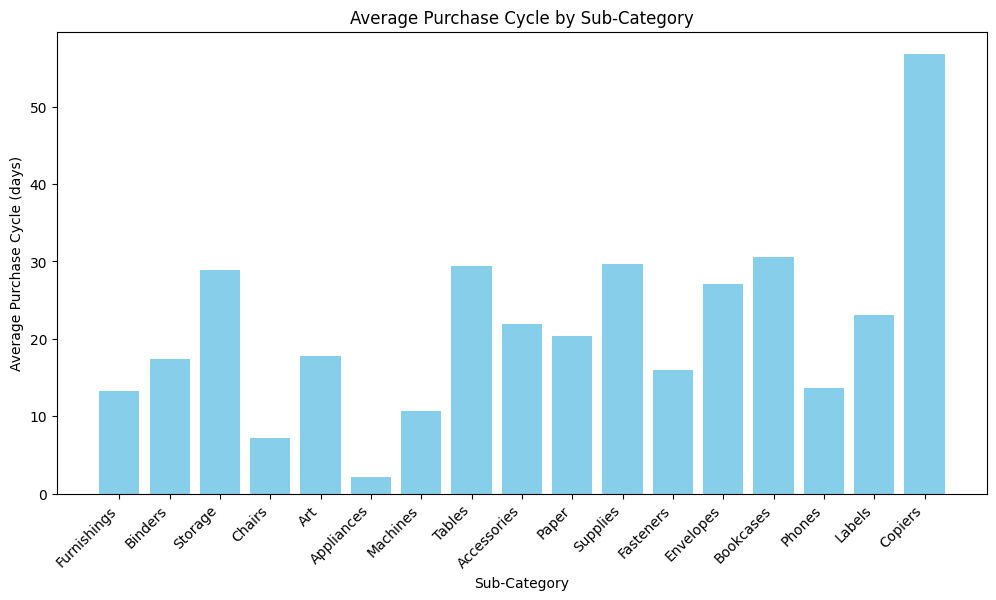

In [12]:
#Sub-Category별 평균 구매 주기
import matplotlib.pyplot as plt

# Order Date를 날짜 형식으로 변환
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 주문 간격을 계산하여 'Order Interval' 칼럼 추가
df['Order Interval'] = df.groupby('Customer ID')['Order Date'].diff().dt.days

# Sub-Category 별 평균 구매 주기를 계산하여 저장
sub_category_avg_purchase_cycle = {}
for sub_category in df['Sub-Category'].unique():
    sub_category_orders = df[df['Sub-Category'] == sub_category]
    sub_category_avg_purchase_cycle[sub_category] = sub_category_orders['Order Interval'].mean()

# 평균 구매 주기를 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.bar(sub_category_avg_purchase_cycle.keys(), sub_category_avg_purchase_cycle.values(), color='skyblue')
plt.title('Average Purchase Cycle by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Average Purchase Cycle (days)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [3]:
#State 별로 어떤 Sub-Category가 많이 팔렸는지(Quantity이용)
state_sub_category_sales = df.groupby(['State', 'Sub-Category'])['Quantity'].sum().reset_index()

# State 별로 Sub-Category의 판매 수량을 내림차순으로 정렬
state_sub_category_sales_sorted = state_sub_category_sales.sort_values(by=['State', 'Quantity'], ascending=[True, False])

# 상위 5개 State의 Sub-Category별 판매 수량 출력
top_states = state_sub_category_sales_sorted['State'].unique()[:5]
for state in top_states:
    state_data = state_sub_category_sales_sorted[state_sub_category_sales_sorted['State'] == state].head()
    print(f"State: {state}")
    print(state_data)
    print()

State: Alabama
     State Sub-Category  Quantity
2  Alabama      Binders        13
0  Alabama  Accessories        10
7  Alabama        Paper        10
1  Alabama          Art         9
9  Alabama     Supplies         4

State: Arizona
      State Sub-Category  Quantity
12  Arizona      Binders        45
19  Arizona        Paper        39
10  Arizona  Accessories        32
21  Arizona      Storage        29
20  Arizona       Phones        27

State: Arkansas
       State Sub-Category  Quantity
25  Arkansas      Binders        28
23  Arkansas  Accessories        24
29  Arkansas      Storage         8
24  Arkansas          Art         6
27  Arkansas        Paper         6

State: California
         State Sub-Category  Quantity
33  California      Binders       396
42  California        Paper       333
32  California          Art       281
39  California  Furnishings       225
30  California  Accessories       224

State: Colorado
       State Sub-Category  Quantity
50  Colorado      Bind

ValueError: Unknown format code 'd' for object of type 'float'

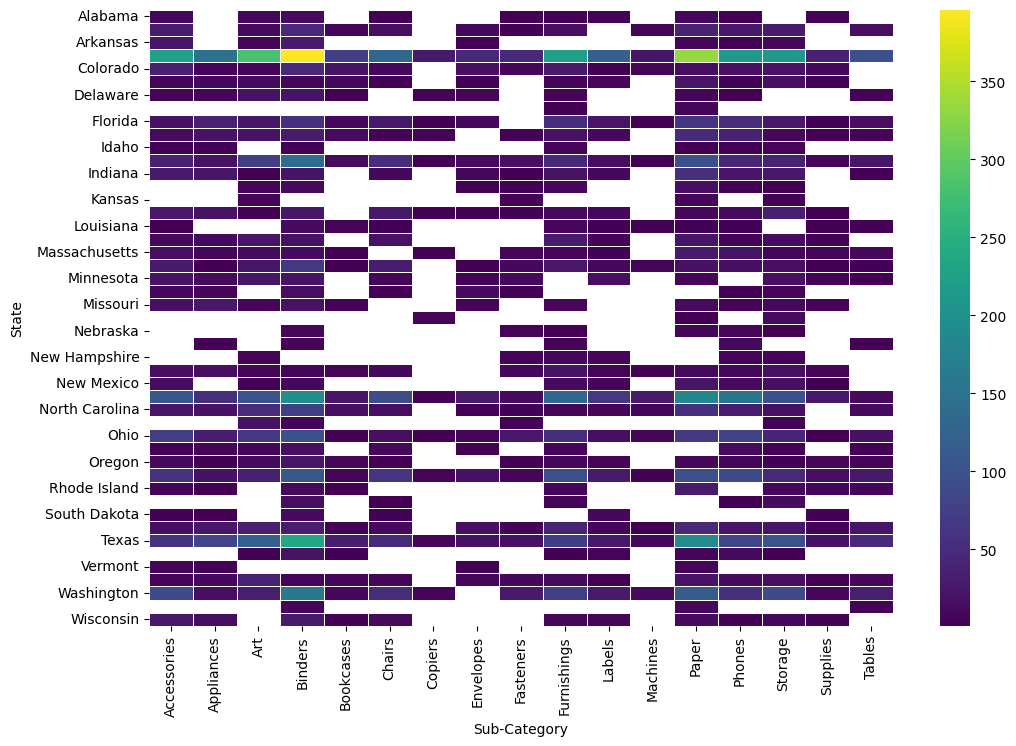

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# State 별로 Sub-Category의 판매 수량을 pivot table로 변환
state_sub_category_pivot = state_sub_category_sales.pivot(index='State', columns='Sub-Category', values='Quantity')

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(state_sub_category_pivot, cmap='viridis', annot=True, fmt="d", linewidths=.5)
plt.title('Quantity of Sub-Categories Sold by State')
plt.xlabel('Sub-Category')
plt.ylabel('State')
plt.show()

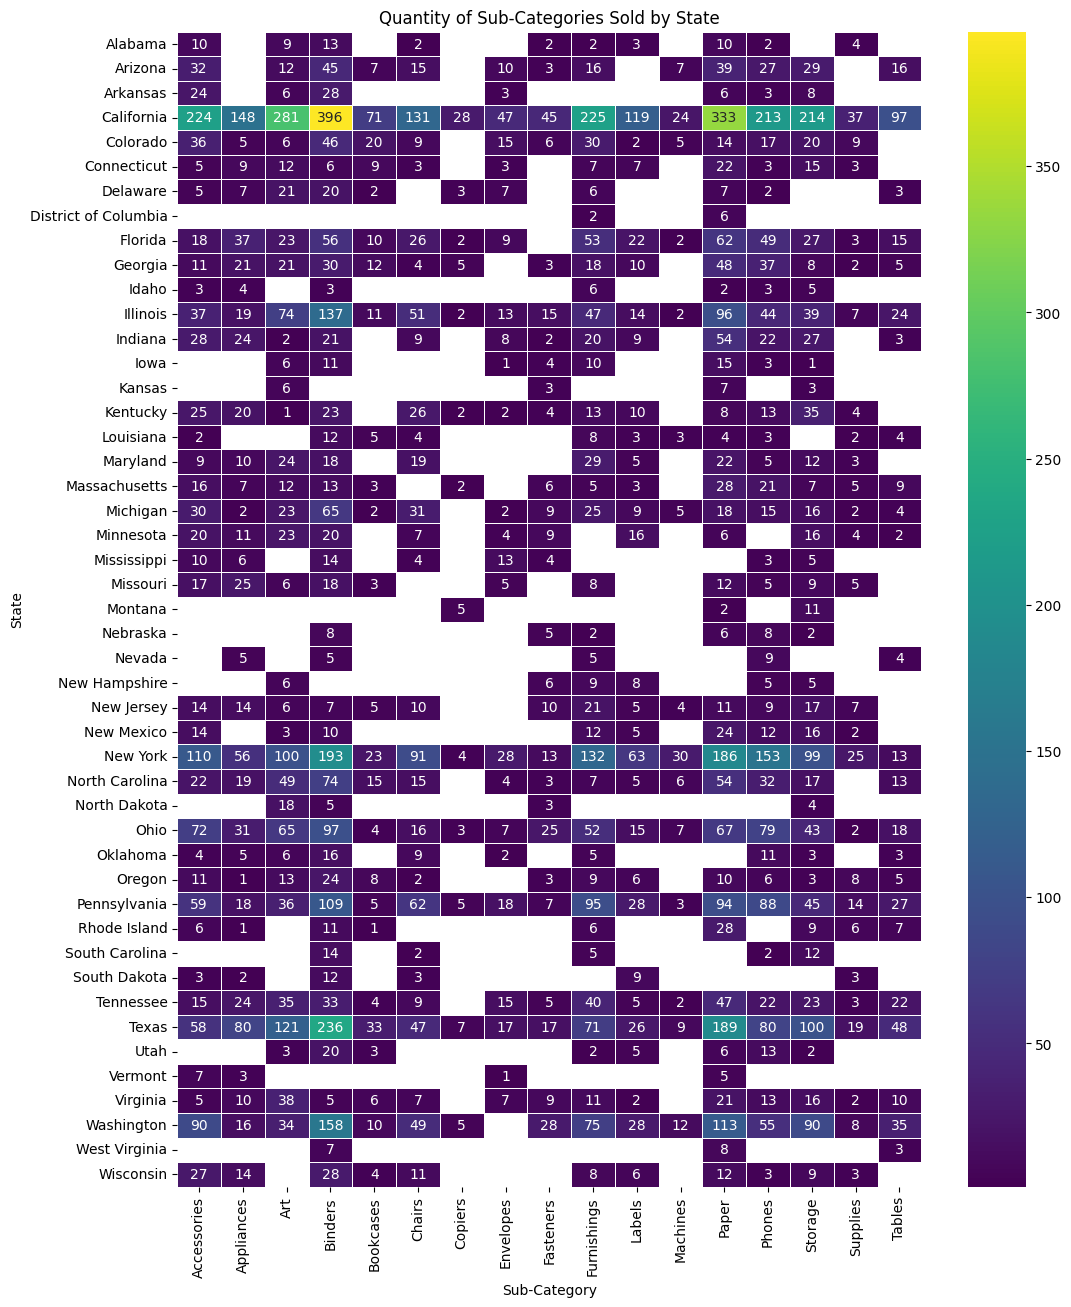

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 시각화
plt.figure(figsize=(12, 15))
sns.heatmap(state_sub_category_pivot, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Quantity of Sub-Categories Sold by State')
plt.xlabel('Sub-Category')
plt.ylabel('State')
plt.show()


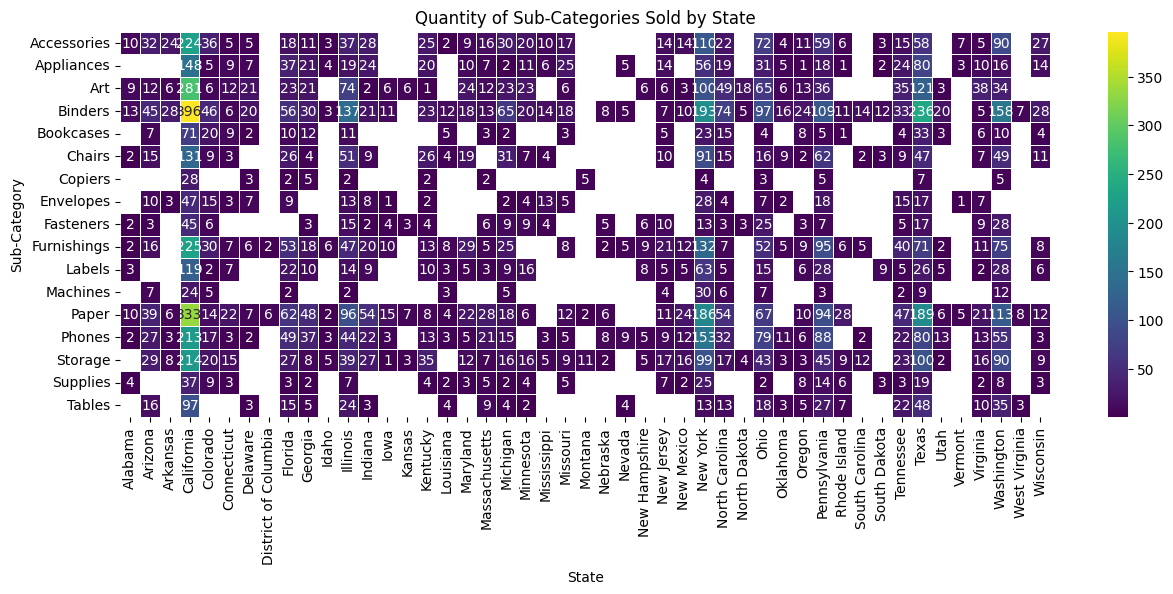

In [12]:
# 히트맵 시각화 (x축과 y축 바꿈)
plt.figure(figsize=(15, 5))
sns.heatmap(state_sub_category_pivot.transpose(), cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Quantity of Sub-Categories Sold by State')
plt.xlabel('State')
plt.ylabel('Sub-Category')
plt.show()

In [14]:
#Quantity를 이용해 State 별로 가장 많이 주문한 Sub-Category를 5개
# State 별로 Sub-Category를 판매 수량으로 그룹화하고 내림차순으로 정렬
state_sub_category_sales_sorted = state_sub_category_sales.groupby('State').apply(lambda x: x.nlargest(5, 'Quantity')).reset_index(drop=True)

# State 별로 가장 많이 주문한 Sub-Category 출력
for state in state_sub_category_sales_sorted['State'].unique():
    state_data = state_sub_category_sales_sorted[state_sub_category_sales_sorted['State'] == state]
    print(f"State: {state}")
    print(state_data)
    print()


State: Alabama
     State Sub-Category  Quantity
0  Alabama      Binders        13
1  Alabama  Accessories        10
2  Alabama        Paper        10
3  Alabama          Art         9
4  Alabama     Supplies         4

State: Arizona
     State Sub-Category  Quantity
5  Arizona      Binders        45
6  Arizona        Paper        39
7  Arizona  Accessories        32
8  Arizona      Storage        29
9  Arizona       Phones        27

State: Arkansas
       State Sub-Category  Quantity
10  Arkansas      Binders        28
11  Arkansas  Accessories        24
12  Arkansas      Storage         8
13  Arkansas          Art         6
14  Arkansas        Paper         6

State: California
         State Sub-Category  Quantity
15  California      Binders       396
16  California        Paper       333
17  California          Art       281
18  California  Furnishings       225
19  California  Accessories       224

State: Colorado
       State Sub-Category  Quantity
20  Colorado      Binders   

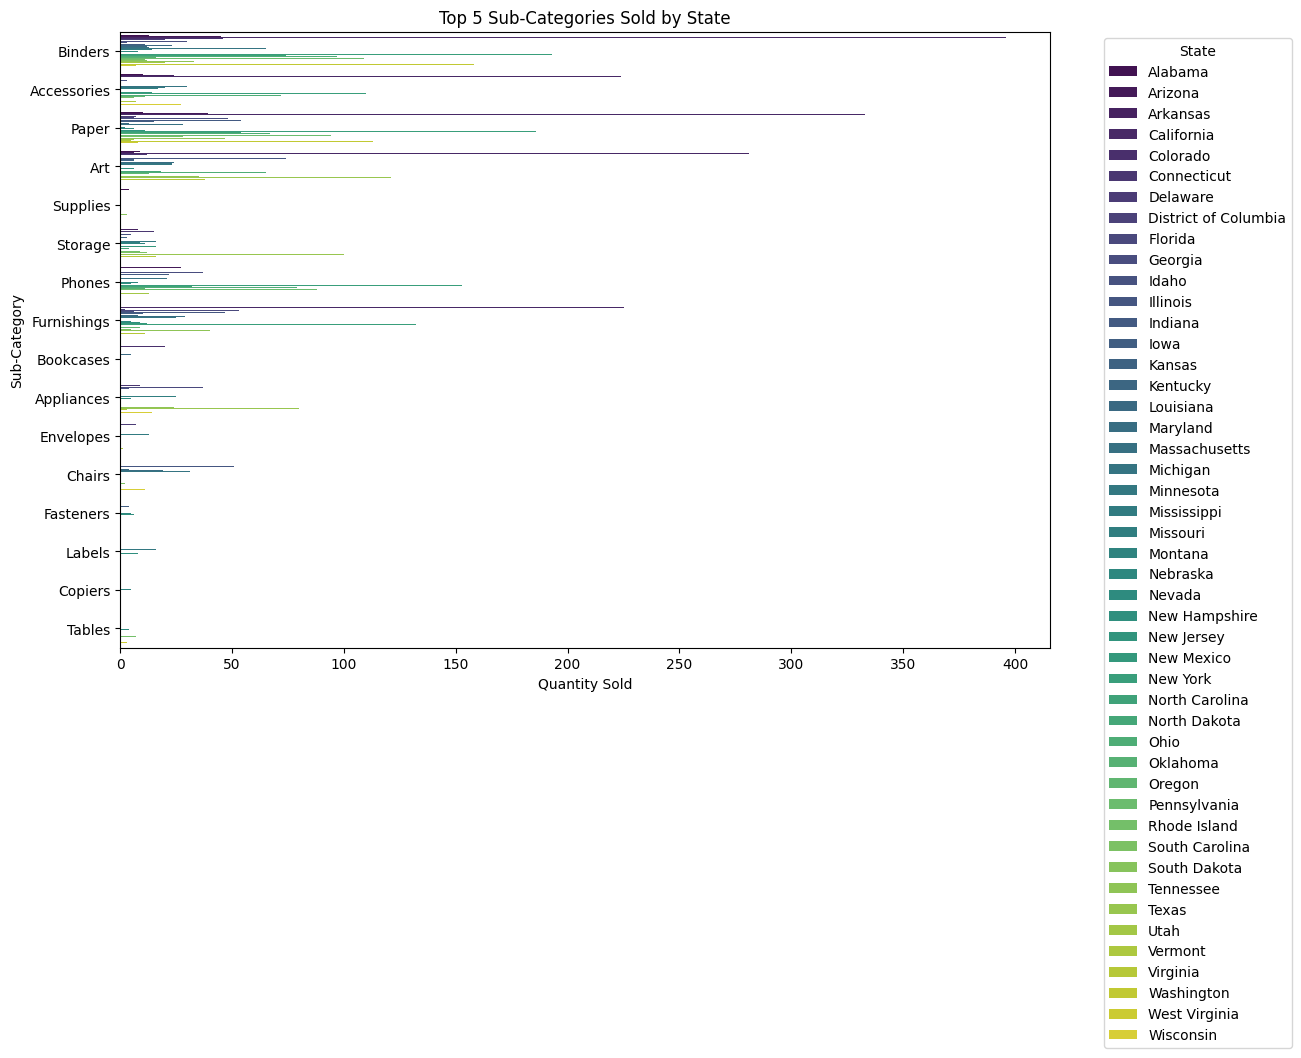

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # State 별로 가장 많이 주문한 상위 5개의 Sub-Category를 시각화
# plt.figure(figsize=(12, 8))
# sns.barplot(x='Quantity', y='Sub-Category', hue='State', data=state_sub_category_sales_sorted, palette='viridis')
# plt.title('Top 5 Sub-Categories Sold by State')
# plt.xlabel('Quantity Sold')
# plt.ylabel('Sub-Category')
# plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()


In [ ]:
# # Segment 별로 Sub-Category를 판매 수량으로 그룹화하고 내림차순으로 정렬
# segment_sub_category_sales_sorted = df.groupby('Segment').apply(lambda x: x.nlargest(1, 'Quantity')).reset_index(drop=True)

# # Segment 별로 가장 많이 주문한 Sub-Category 출력
# print(segment_sub_category_sales_sorted[['Segment', 'Sub-Category', 'Quantity']])


       Segment Sub-Category  Quantity
0     Consumer      Binders        14
1    Corporate  Accessories        14
2  Home Office       Chairs        14


In [ ]:
# # Segment 별로 가장 많이 주문한 Sub-Category 찾기
# segment_most_ordered = df.groupby('Segment')['Sub-Category'].apply(lambda x: x.value_counts().index[0]).reset_index()

# # Segment 별로 가장 많이 주문한 Sub-Category 출력
# print(segment_most_ordered)

       Segment Sub-Category
0     Consumer      Binders
1    Corporate      Binders
2  Home Office      Binders


In [15]:
# State와 Segment를 기준으로 그룹화하여 State 별 Segment 비율 확인
state_segment_distribution = df.groupby(['State', 'Segment']).size().reset_index(name='Count')

# 각 State에서 Segment 별 비율 계산
state_segment_distribution['Percentage'] = state_segment_distribution.groupby('State')['Count'].transform(lambda x: x / x.sum())

# State 별 Segment 비율 출력
print(state_segment_distribution)

             State      Segment  Count  Percentage
0          Alabama     Consumer      3    0.187500
1          Alabama    Corporate      6    0.375000
2          Alabama  Home Office      7    0.437500
3          Arizona     Consumer     32    0.457143
4          Arizona    Corporate     14    0.200000
..             ...          ...    ...         ...
124  West Virginia     Consumer      1    0.250000
125  West Virginia  Home Office      3    0.750000
126      Wisconsin     Consumer      7    0.212121
127      Wisconsin    Corporate     21    0.636364
128      Wisconsin  Home Office      5    0.151515

[129 rows x 4 columns]


In [16]:
# 지역별로 가장 많은 Segment
# State와 Segment를 기준으로 그룹화하여 Segment별 빈도수 계산
state_segment_counts = df.groupby(['State', 'Segment']).size().reset_index(name='Count')

# 각 State에서 가장 많이 등장하는 Segment 선택
state_most_common_segment = state_segment_counts.loc[state_segment_counts.groupby('State')['Count'].idxmax()]

# State 별로 가장 많이 등장하는 Segment 출력
print(state_most_common_segment)

                    State      Segment  Count
2                 Alabama  Home Office      7
3                 Arizona     Consumer     32
6                Arkansas     Consumer      8
9              California     Consumer    328
12               Colorado     Consumer     34
15            Connecticut     Consumer     19
19               Delaware    Corporate      9
21   District of Columbia  Home Office      2
22                Florida     Consumer     65
26                Georgia    Corporate     27
28                  Idaho     Consumer      4
31               Illinois     Consumer     83
34                Indiana     Consumer     25
37                   Iowa     Consumer      7
41                 Kansas    Corporate      5
42               Kentucky     Consumer     27
45              Louisiana     Consumer     13
48               Maryland    Corporate     17
50          Massachusetts     Consumer     18
53               Michigan     Consumer     34
56              Minnesota     Cons

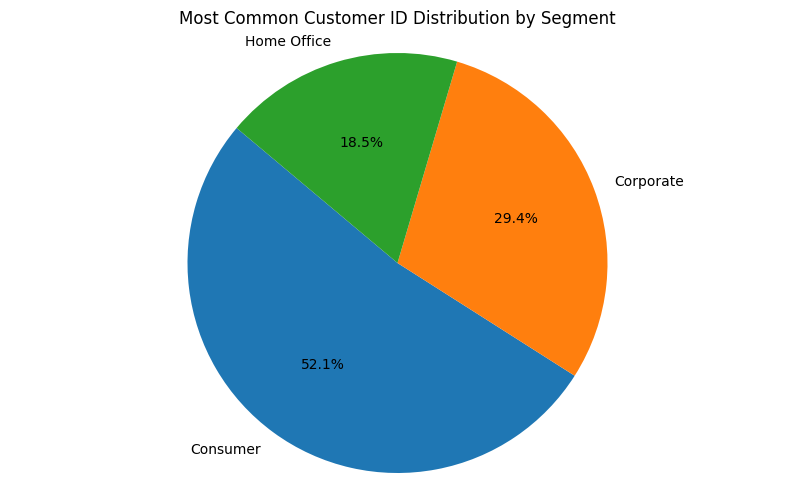

In [17]:
# Segment 별로 가장 많은 Customer ID를 계산한 후에 변수 정의
segment_most_common_customer_id = df.groupby('Segment')['Customer ID'].nunique().reset_index()
segment_most_common_customer_id.columns = ['Segment', 'Count']

# Segment 별로 가장 많은 Customer ID를 원 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.pie(segment_most_common_customer_id['Count'], labels=segment_most_common_customer_id['Segment'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Most Common Customer ID Distribution by Segment')
plt.show()

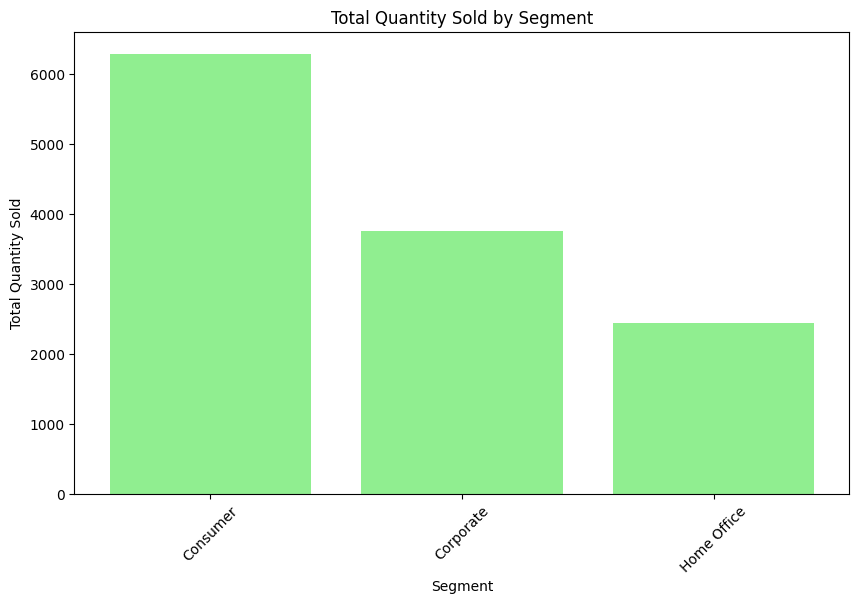

In [32]:
# 각 Segment에서의 총 판매량 계산
segment_sales = df.groupby('Segment')['Quantity'].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(segment_sales['Segment'], segment_sales['Quantity'], color='lightgreen')
plt.xlabel('Segment')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by Segment')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

In [18]:
# Segment별 주문 횟수 계산
segment_order_count = df.groupby('Segment')['Order ID'].nunique().reset_index()
segment_order_count.columns = ['Segment', 'Order Count']
print(segment_order_count)

       Segment  Order Count
0     Consumer          876
1    Corporate          493
2  Home Office          318


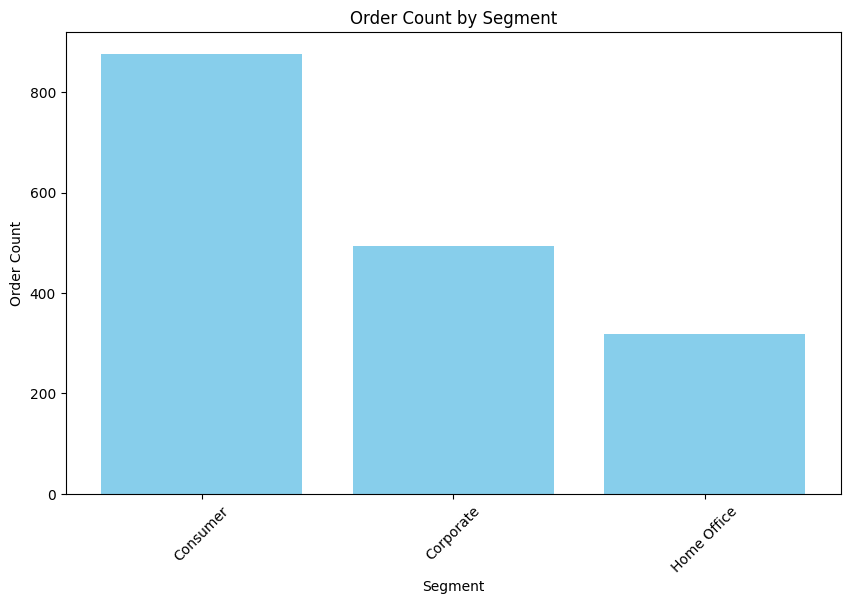

In [21]:
# Segment별 주문 횟수 계산
segment_order_count = df.groupby('Segment')['Order ID'].nunique().reset_index()
segment_order_count.columns = ['Segment', 'Order Count']

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(segment_order_count['Segment'], segment_order_count['Order Count'], color='skyblue')
plt.xlabel('Segment')
plt.ylabel('Order Count')
plt.title('Order Count by Segment')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()


In [22]:
# Segment별 평균 주문량 계산
segment_avg_order_quantity = df.groupby('Segment')['Quantity'].mean().reset_index()
segment_avg_order_quantity.columns = ['Segment', 'Avg Order Quantity']
print(segment_avg_order_quantity)

       Segment  Avg Order Quantity
0     Consumer            3.766187
1    Corporate            3.834694
2  Home Office            3.668675


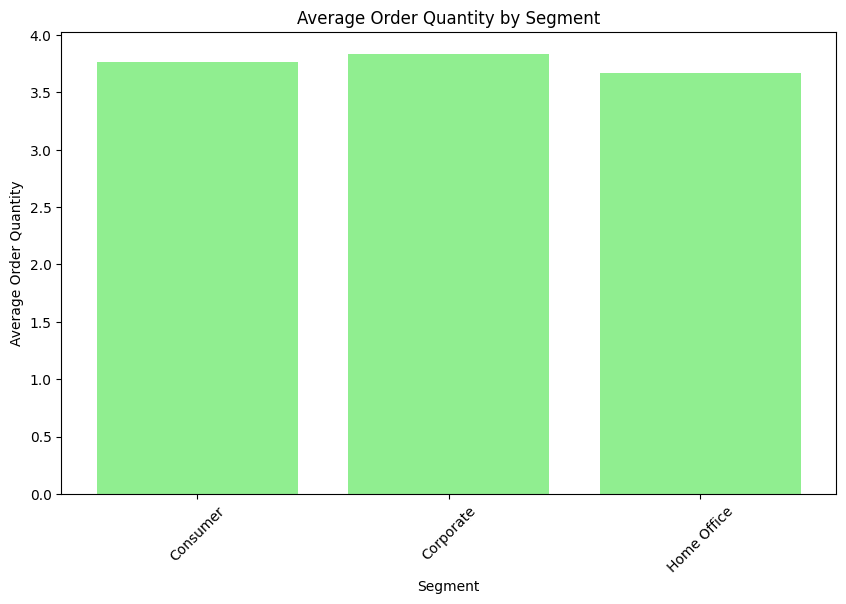

In [23]:
# 시각화
plt.figure(figsize=(10, 6))
plt.bar(segment_avg_order_quantity['Segment'], segment_avg_order_quantity['Avg Order Quantity'], color='lightgreen')
plt.xlabel('Segment')
plt.ylabel('Average Order Quantity')
plt.title('Average Order Quantity by Segment')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

In [24]:
# Segment별 총 매출 계산
segment_total_sales = df.groupby('Segment')['Sales'].sum().reset_index()
segment_total_sales.columns = ['Segment', 'Total Sales']
print(segment_total_sales)

       Segment  Total Sales
0     Consumer  331904.6999
1    Corporate  241847.8244
2  Home Office  159462.7309


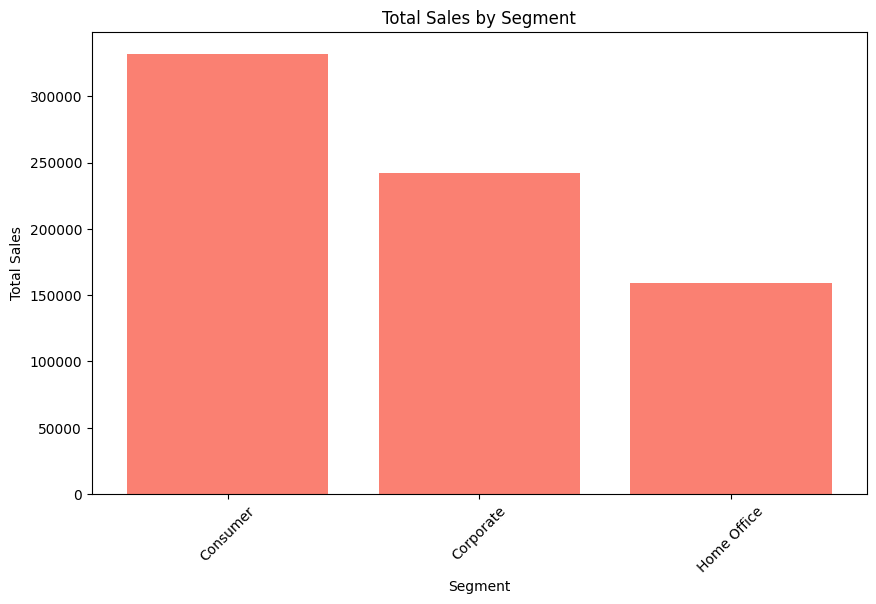

In [25]:
# 시각화
plt.figure(figsize=(10, 6))
plt.bar(segment_total_sales['Segment'], segment_total_sales['Total Sales'], color='salmon')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Total Sales by Segment')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

In [26]:
# Segment별 평균 할인율 계산
df['Discount Amount'] = df['Discount'] * df['Sales']
segment_avg_discount_rate = (df.groupby('Segment')['Discount Amount'].sum() / df.groupby('Segment')['Sales'].sum()).reset_index()
segment_avg_discount_rate.columns = ['Segment', 'Avg Discount Rate']
print(segment_avg_discount_rate)

       Segment  Avg Discount Rate
0     Consumer           0.132241
1    Corporate           0.140635
2  Home Office           0.146422


In [56]:
# # Segment별 평균 이익 계산
# df['Profit'] = df['Sales'] - df['Profit']
# segment_avg_profit = df.groupby('Segment')['Profit'].mean().reset_index()
# segment_avg_profit.columns = ['Segment', 'Avg Profit']
# print(segment_avg_profit)

       Segment  Avg Profit
0     Consumer  171.664545
1    Corporate  219.454552
2  Home Office  208.394674


In [58]:
# # Segment별 평균 이익 계산 (Sales만으로)
# segment_avg_profit = df.groupby('Segment')['Sales'].mean().reset_index()
# segment_avg_profit.columns = ['Segment', 'Avg Sales']
# segment_avg_profit

,Segment,Avg Sales
0,Consumer,198.983633
1,Corporate,246.783494
2,Home Office,240.154715


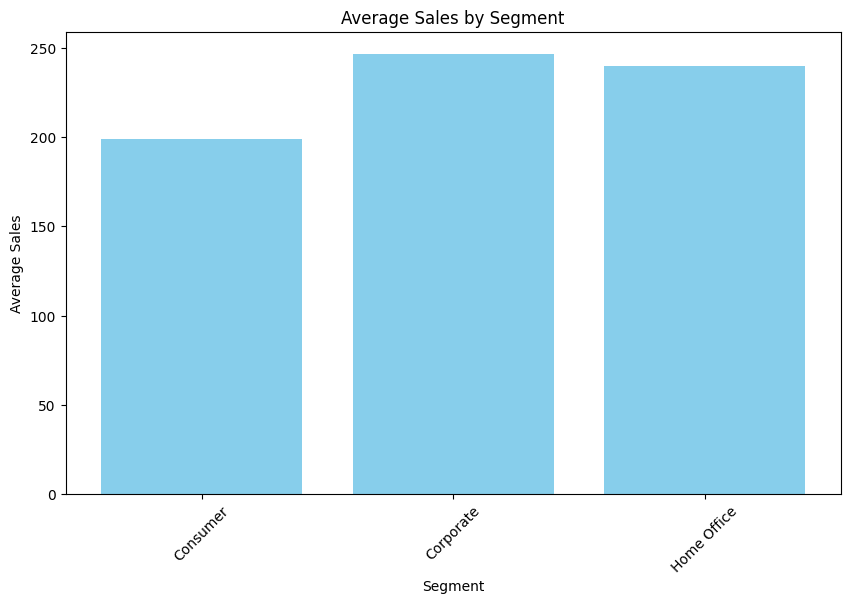

In [30]:
# # 시각화
# plt.figure(figsize=(10, 6))
# plt.bar(segment_avg_profit['Segment'], segment_avg_profit['Avg Sales'], color='skyblue')
# plt.xlabel('Segment')
# plt.ylabel('Average Sales')
# plt.title('Average Sales by Segment')
# plt.xticks(rotation=45)  # x축 레이블 회전
# plt.show()


In [31]:
# Segment별 인기 있는 제품 카테고리 및 서브 카테고리 분석
popular_categories_by_segment = df.groupby(['Segment', 'Category', 'Sub-Category'])['Order ID'].count().reset_index()
popular_categories_by_segment = popular_categories_by_segment.sort_values(by='Order ID', ascending=False).groupby('Segment').head(1)
print(popular_categories_by_segment)

        Segment         Category Sub-Category  Order ID
6      Consumer  Office Supplies      Binders       243
23    Corporate  Office Supplies      Binders       156
40  Home Office  Office Supplies      Binders       101


In [61]:
# Segment별 인기 있는 제품 카테고리 및 서브 카테고리 분석
popular_categories_by_segment = df.groupby(['Segment', 'Category', 'Sub-Category'])['Order ID'].count().reset_index()
popular_categories_by_segment = popular_categories_by_segment.sort_values(by=['Segment', 'Order ID'], ascending=[True, False])
popular_categories_by_segment = popular_categories_by_segment.groupby('Segment').head(5)
for segment, data in popular_categories_by_segment.groupby('Segment'):
    print(f"\nSegment: {segment}")
    print(data)


Segment: Consumer
     Segment         Category Sub-Category  Order ID
6   Consumer  Office Supplies      Binders       243
10  Consumer  Office Supplies        Paper       236
2   Consumer        Furniture  Furnishings       161
5   Consumer  Office Supplies          Art       150
13  Consumer       Technology  Accessories       140

Segment: Corporate
      Segment         Category Sub-Category  Order ID
23  Corporate  Office Supplies      Binders       156
27  Corporate  Office Supplies        Paper       134
19  Corporate        Furniture  Furnishings        90
33  Corporate       Technology       Phones        89
28  Corporate  Office Supplies      Storage        88

Segment: Home Office
        Segment         Category Sub-Category  Order ID
40  Home Office  Office Supplies      Binders       101
44  Home Office  Office Supplies        Paper        89
50  Home Office       Technology       Phones        68
36  Home Office        Furniture  Furnishings        65
39  Home Office  

In [62]:
# Segment별 인기 있는 제품 Category 및 Sub-Category 분석
popular_categories_by_segment = df.groupby(['Segment', 'Category', 'Sub-Category'])['Quantity'].sum().reset_index()
popular_categories_by_segment = popular_categories_by_segment.sort_values(by=['Segment', 'Quantity'], ascending=[True, False])
popular_categories_by_segment = popular_categories_by_segment.groupby('Segment').head(1)
print(popular_categories_by_segment)

        Segment         Category Sub-Category  Quantity
6      Consumer  Office Supplies      Binders       976
23    Corporate  Office Supplies      Binders       646
40  Home Office  Office Supplies      Binders       445


In [65]:
# Segment별 인기 있는 제품 Category 및 Sub-Category 분석 (상위 5개씩)
popular_categories_by_segment = df.groupby(['Segment', 'Category', 'Sub-Category'])['Quantity'].sum().reset_index()
popular_categories_by_segment = popular_categories_by_segment.sort_values(by=['Segment', 'Quantity'], ascending=[True, False])
popular_categories_by_segment = popular_categories_by_segment.groupby('Segment').head(5)
for segment, data in popular_categories_by_segment.groupby('Segment'):
    print(f"\nSegment: {segment}")
    print(data)
# print(popular_categories_by_segment)


Segment: Consumer
     Segment         Category Sub-Category  Quantity
6   Consumer  Office Supplies      Binders       976
10  Consumer  Office Supplies        Paper       897
5   Consumer  Office Supplies          Art       616
2   Consumer        Furniture  Furnishings       563
13  Consumer       Technology  Accessories       548

Segment: Corporate
      Segment         Category Sub-Category  Quantity
23  Corporate  Office Supplies      Binders       646
27  Corporate  Office Supplies        Paper       493
30  Corporate       Technology  Accessories       354
19  Corporate        Furniture  Furnishings       327
28  Corporate  Office Supplies      Storage       324

Segment: Home Office
        Segment         Category Sub-Category  Quantity
40  Home Office  Office Supplies      Binders       445
44  Home Office  Office Supplies        Paper       312
45  Home Office  Office Supplies      Storage       244
50  Home Office       Technology       Phones       241
36  Home Office  

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 로드
# df = pd.read_csv('your_dataset.csv')

# 'Order Date' 칼럼을 날짜 형식으로 변환
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 주문이 발생한 월을 추출하여 'Order Month' 칼럼 생성
df['Order Month'] = df['Order Date'].dt.to_period('M')

# 월별 주문 횟수 계산
monthly_orders = df.groupby('Order Month').size().reset_index(name='Order Count')

# 결과 출력
print(monthly_orders)

   Order Month  Order Count
0      2020-01          226
1      2020-02          234
2      2020-03          304
3      2020-04          229
4      2020-05          241
5      2020-06          229
6      2020-07          244
7      2020-08          251
8      2020-09          385
9      2020-10          272
10     2020-11          375
11     2020-12          322


C:\Users\utw09\AppData\Local\Temp\ipykernel_8184\3607030327.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


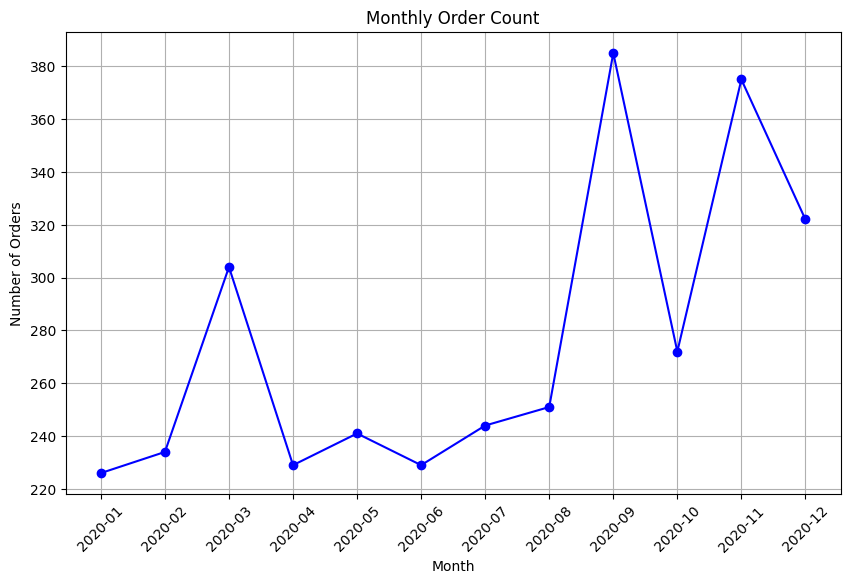

In [6]:
# 월별 주문 횟수 시각화
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders['Order Month'].astype(str), monthly_orders['Order Count'], marker='o', color='b')
plt.title('Monthly Order Count')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
# df = pd.read_csv("your_data.csv")  # 여기에 데이터 파일 경로를 넣어주세요.

# 'Order Date' 열을 날짜 형식으로 변환
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 주문 월(month) 열 추가
df['Order Month'] = df['Order Date'].dt.month

# 할인된 총 금액과 주문 총 금액 계산
df['Discounted Total'] = df['Sales'] * (1 - df['Discount'])
df['Order Total'] = df['Sales'] / (1 - df['Discount'])

# 월별 할인된 총 금액과 주문 총 금액 계산
monthly_discounted_total = df.groupby('Order Month')['Discounted Total'].sum()
monthly_order_total = df.groupby('Order Month')['Order Total'].sum()

# 월별 할인율 계산
monthly_discount_rate = (monthly_order_total - monthly_discounted_total) / monthly_order_total * 100
monthly_discount_rate

Order Month
1     20.821702
2     32.904183
3     21.110914
4     54.279487
5     19.844005
6     25.497248
7     37.889536
8     30.664606
9     29.924169
10    38.811971
11    32.337282
12    25.747227
dtype: float64

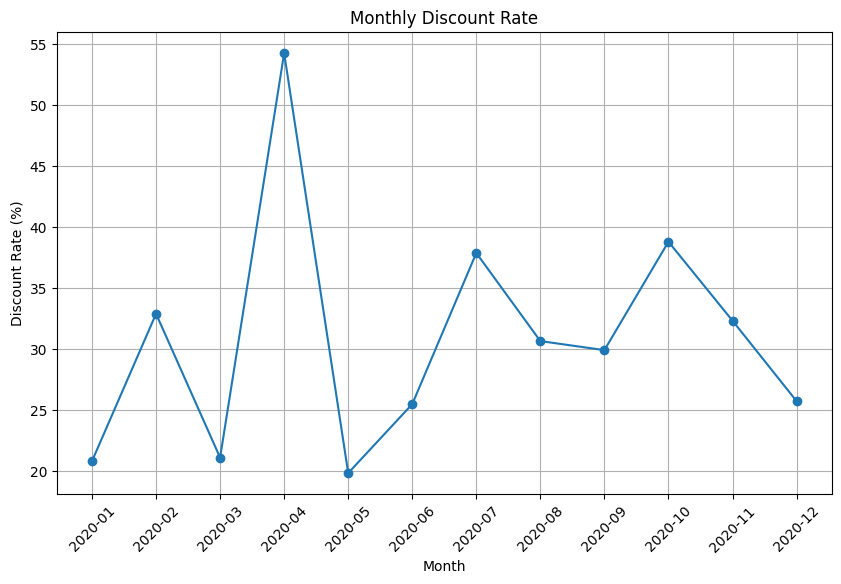

In [13]:
# 시각화
plt.figure(figsize=(10, 6))
plt.plot(monthly_discount_rate.index, monthly_discount_rate.values, marker='o', linestyle='-')
plt.title('Monthly Discount Rate')
plt.xlabel('Month')
plt.ylabel('Discount Rate (%)')
plt.xticks(range(1, 13), ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'], rotation=45)
plt.grid(True)
plt.show()

In [15]:
#월별 판매수량 분석, Quantity를 이용해 category, sub-Category를 월별로 분류
# 'Order Date' 칼럼을 월별로 변환하여 새로운 칼럼 추가
df['Order Month'] = df['Order Date'].dt.to_period('M')

# 월별로 데이터 그룹화 및 판매 수량 계산
monthly_sales = df.groupby('Order Month').agg({'Quantity': 'sum'}).reset_index()

# Category 및 Sub-Category별로 판매 수량 계산
category_subcategory_sales = df.groupby(['Order Month', 'Category', 'Sub-Category']).agg({'Quantity': 'sum'}).reset_index()
category_subcategory_sales

,Order Month,Category,Sub-Category,Quantity
0,2020-01,Furniture,Bookcases,17
1,2020-01,Furniture,Chairs,54
2,2020-01,Furniture,Furnishings,81
3,2020-01,Furniture,Tables,27
4,2020-01,Office Supplies,Appliances,42
...,...,...,...,...
194,2020-12,Office Supplies,Supplies,31
195,2020-12,Technology,Accessories,109
196,2020-12,Technology,Copiers,9
197,2020-12,Technology,Machines,5


In [20]:
#sales를 이용한 월별 매출액
# 'Order Date' 칼럼을 월별로 변환
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Month'] = df['Order Date'].dt.to_period('M')

# 월별 매출액 계산
monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()
# Period 형식을 datetime 형식으로 변환
monthly_sales['Order Month'] = monthly_sales['Order Month'].dt.to_timestamp() 
monthly_sales

,Order Month,Sales
0,2020-01-01,64734.3110
1,2020-02-01,50011.4894
2,2020-03-01,74774.0838
3,2020-04-01,39072.0016
4,2020-05-01,40882.4464
5,2020-06-01,47742.3255
6,2020-07-01,54382.0875
7,2020-08-01,75675.3040
8,2020-09-01,74164.6080
9,2020-10-01,65501.1622


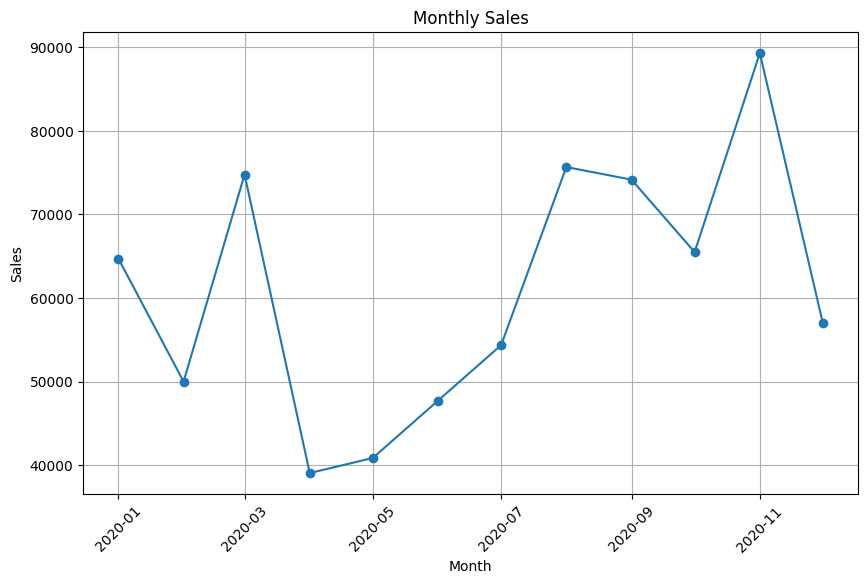

In [32]:
# 시각화
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Order Month'], monthly_sales['Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
# plt.xticks(range(1, 13), ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],rotation=45)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


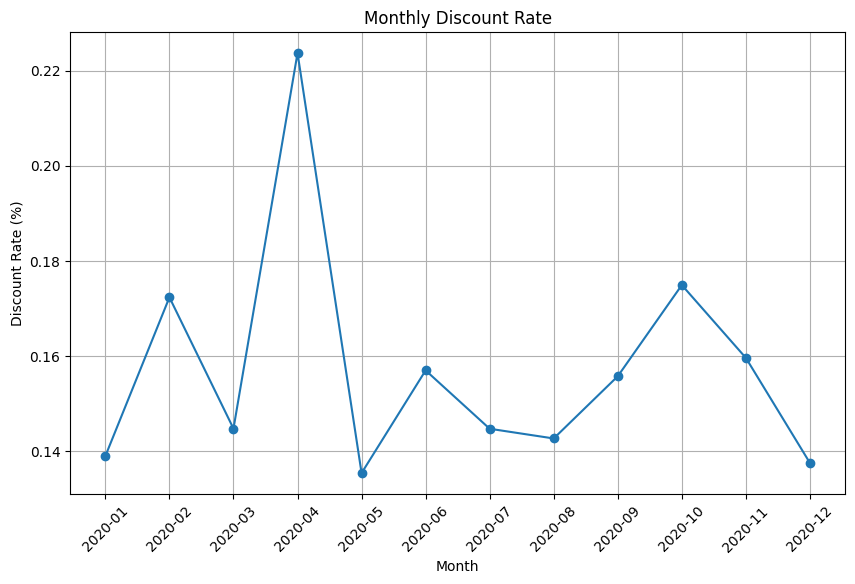

In [34]:
# 월별 할인율 계산
monthly_discount_rate = df.groupby(df['Order Date'].dt.to_period('M'))['Discount'].mean()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(monthly_discount_rate.index.astype(str), monthly_discount_rate.values, marker='o', linestyle='-')
plt.title('Monthly Discount Rate')
plt.xlabel('Month')
plt.ylabel('Discount Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [37]:
# 각 Sub-Category 별로 주문 횟수와 총 수량 계산
sub_category_orders = df.groupby('Sub-Category').agg({'Order ID': 'count', 'Quantity': 'sum'}).reset_index()

# 주문 횟수당 평균 주문 수량 계산
sub_category_orders['Avg Quantity per Order'] = sub_category_orders['Quantity'] / sub_category_orders['Order ID']

# 평균 주문 수량 기준으로 내림차순 정렬
sub_category_orders = sub_category_orders.sort_values(by='Avg Quantity per Order', ascending=False)

# 결과 출력
print(sub_category_orders)

   Sub-Category  Order ID  Quantity  Avg Quantity per Order
3       Binders       500      2067                4.134000
1    Appliances       165       654                3.963636
10       Labels       114       448                3.929825
0   Accessories       275      1079                3.923636
2           Art       282      1101                3.904255
8     Fasteners        64       249                3.890625
16       Tables       104       390                3.750000
12        Paper       459      1702                3.708061
13       Phones       294      1090                3.707483
11     Machines        33       121                3.666667
4     Bookcases        76       276                3.631579
14      Storage       288      1022                3.548611
5        Chairs       190       674                3.547368
9   Furnishings       316      1097                3.471519
7     Envelopes        71       241                3.394366
6       Copiers        22        73     

In [39]:
# 'Machines' 품목에 해당하는 Product Name 필터링
machines_products = df[df['Sub-Category'] == 'Machines']['Product Name'].unique()
print(machines_products)

['Cisco CP-7937G Unified IP Conference Station Phone'
 'Lexmark MX611dhe Monochrome Laser Printer'
 'I.R.I.S IRISCard Anywhere 5 Card Scanner'
 'HP Officejet Pro 8600 e-All-In-One Printer, Copier, Scanner, Fax'
 'StarTech.com 10/100 VDSL2 Ethernet Extender Kit'
 'Cubify CubeX 3D Printer Double Head Print' 'Okidata B400 Printer'
 'Hewlett-Packard 300S Scientific Calculator'
 'Cisco Desktop Collaboration Experience DX650 IP Video Phone'
 'Hewlett-Packard Desktjet 6988DT Refurbished Printer'
 'Hewlett-Packard Deskjet 5550 Printer'
 'Okidata MB491 Multifunction Printer' 'Bady BDG101FRU Card Printer'
 'Ricoh - Ink Collector Unit for GX3000 Series Printers'
 'Lexmark MarkNet N8150 Wireless Print Server'
 'Lexmark 20R1285 X6650 Wireless All-in-One Printer'
 'Socket Bluetooth Cordless Hand Scanner (CHS)'
 'Wasp CCD Handheld Bar Code Reader'
 'Fellowes Powershred HS-440 4-Sheet High Security Shredder'
 '3D Systems Cube Printer, 2nd Generation, Magenta'
 'Swingline SM12-08 MicroCut Jam Free Shre

In [46]:
# 데이터셋을 분기별로 분류
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Quarter'] = df['Order Date'].dt.quarter

# 각 분기별로 판매량이 가장 많은 Sub-Category와 가장 적은 Sub-Category 식별
quarterly_sales = df.groupby(['Quarter', 'Sub-Category'])['Quantity'].sum().reset_index()
max_sales_per_quarter = quarterly_sales.loc[quarterly_sales.groupby('Quarter')['Quantity'].idxmax()]
min_sales_per_quarter = quarterly_sales.loc[quarterly_sales.groupby('Quarter')['Quantity'].idxmin()]
print(max_sales_per_quarter)
print(min_sales_per_quarter)

    Quarter Sub-Category  Quantity
3         1      Binders       475
20        2      Binders       471
36        3      Binders       521
53        4      Binders       600
    Quarter Sub-Category  Quantity
6         1      Copiers        25
27        2     Machines        21
44        3     Machines        15
56        4      Copiers        19


C:\Users\utw09\AppData\Local\Temp\ipykernel_8184\1161765848.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Quarter-1', 'Quarter-2', 'Quarter-3', 'Quarter-4'])
C:\Users\utw09\AppData\Local\Temp\ipykernel_8184\1161765848.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Quarter-1', 'Quarter-2', 'Quarter-3', 'Quarter-4'])


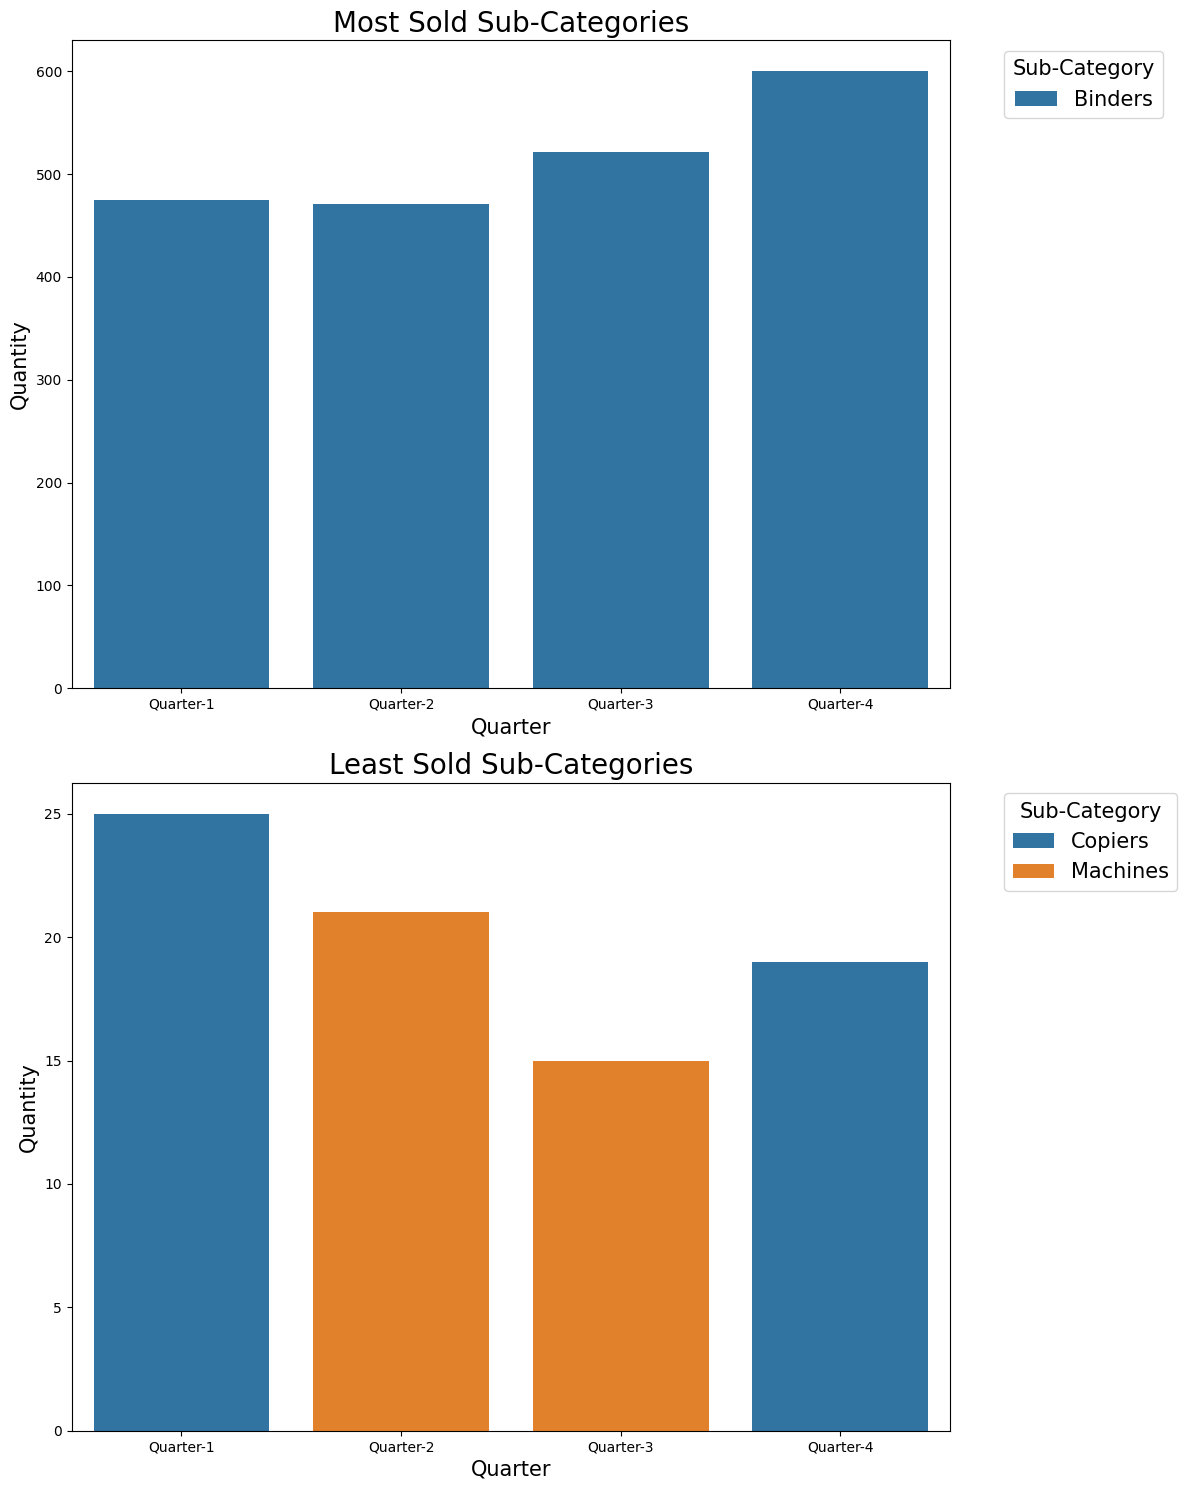

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
# 시각화
fig, axes = plt.subplots(2, 1, figsize=(12, 15))

for ax, sales, title in zip(axes, [max_sales_per_quarter, min_sales_per_quarter], ['Most Sold Sub-Categories', 'Least Sold Sub-Categories']):
    sns.barplot(data=sales, x='Quarter', y='Quantity', hue='Sub-Category', ax=ax)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel('Quantity', fontsize=15)
    ax.set_xlabel('Quarter',fontsize=15)
    ax.set_xticklabels(['Quarter-1', 'Quarter-2', 'Quarter-3', 'Quarter-4'])
    ax.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, title_fontsize=15)
plt.tight_layout()
plt.show()

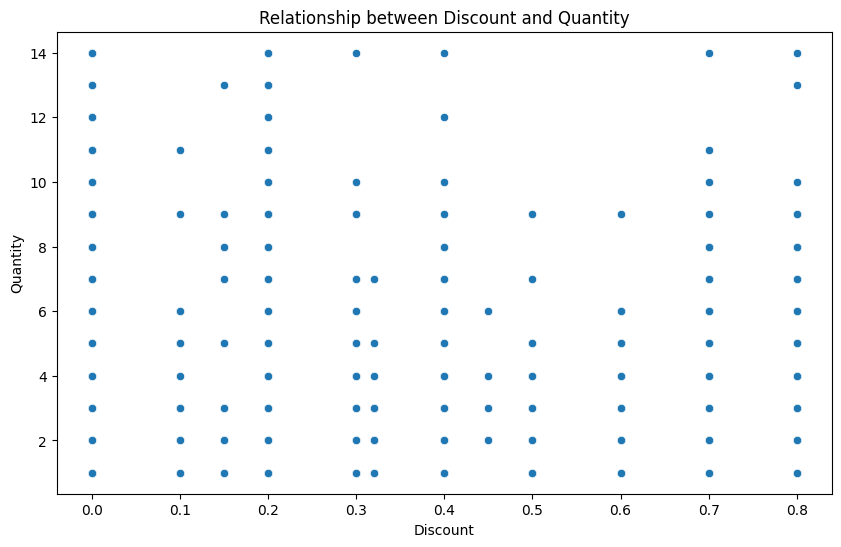

Correlation between Discount and Quantity: 0.01918383593951018


In [60]:
# 할인율과 구매량 데이터 추출
discount_quantity_data = df[['Discount', 'Quantity']]

# 산점도 그래프 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=discount_quantity_data, x='Discount', y='Quantity')
plt.title('Relationship between Discount and Quantity')
plt.xlabel('Discount')
plt.ylabel('Quantity')
plt.show()

# 상관 관계 계산
correlation = discount_quantity_data['Discount'].corr(discount_quantity_data['Quantity'])
print("Correlation between Discount and Quantity:", correlation)

In [61]:
# Copiers나 Machines에 해당하는 데이터만 필터링
copiers_data = df[df['Sub-Category'] == 'Copiers']
machines_data = df[df['Sub-Category'] == 'Machines']

# Copiers나 Machines의 할인율과 구매량 간의 상관 관계 계산
correlation_copiers = copiers_data['Discount'].corr(copiers_data['Quantity'])
correlation_machines = machines_data['Discount'].corr(machines_data['Quantity'])

print("Correlation between Discount and Quantity for Copiers:", correlation_copiers)
print("Correlation between Discount and Quantity for Machines:", correlation_machines)

Correlation between Discount and Quantity for Copiers: 0.12966573243244323
Correlation between Discount and Quantity for Machines: -0.2076435356192183


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copiers와 Machines의 데이터 추출
copiers_data = df[df['Sub-Category'] == 'Copiers']
machines_data = df[df['Sub-Category'] == 'Machines']

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Quantity', data=copiers_data, label='Copiers')
sns.scatterplot(x='Discount', y='Quantity', data=machines_data, label='Machines')

# 상관관계 선 그리기
sns.regplot(x='Discount', y='Quantity', data=copiers_data, scatter=False)
sns.regplot(x='Discount', y='Quantity', data=machines_data, scatter=False)

plt.xlabel('Discount')
plt.ylabel('Quantity')
plt.title('Relationship between Discount and Quantity')
plt.legend()
plt.show()

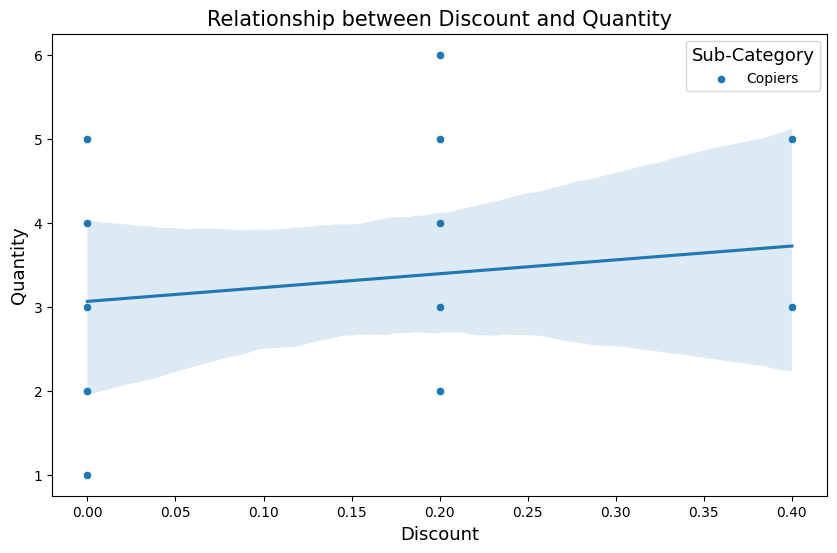

In [69]:
# Copiers 데이터 추출
copiers_data = df[df['Sub-Category'] == 'Copiers']

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Quantity', data=copiers_data, label='Copiers')

# 상관관계 선 그리기
sns.regplot(x='Discount', y='Quantity', data=copiers_data, scatter=False)

plt.xlabel('Discount', fontsize=13)
plt.ylabel('Quantity', fontsize=13)
plt.title('Relationship between Discount and Quantity', fontsize=15)
plt.legend(title='Sub-Category', fontsize=10, title_fontsize=13)
plt.show()

In [72]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Copiers와 Machines의 데이터 추출
copiers_data = df[df['Sub-Category'] == 'Copiers']
machines_data = df[df['Sub-Category'] == 'Machines']

# Copiers에 대한 선형 회귀 분석
copiers_X = copiers_data['Discount'].values.reshape(-1, 1)
copiers_y = copiers_data['Quantity'].values.reshape(-1, 1)
copiers_reg = LinearRegression().fit(copiers_X, copiers_y)

# Machines에 대한 선형 회귀 분석
machines_X = machines_data['Discount'].values.reshape(-1, 1)
machines_y = machines_data['Quantity'].values.reshape(-1, 1)
machines_reg = LinearRegression().fit(machines_X, machines_y)

# 결과 출력
print("Copiers: Slope =", copiers_reg.coef_[0][0], "Intercept =", copiers_reg.intercept_[0])
print("Machines: Slope =", machines_reg.coef_[0][0], "Intercept =", machines_reg.intercept_[0])

Copiers: Slope = 1.6473988439306355 Intercept = 3.063583815028902
Machines: Slope = -2.040816326530612 Intercept = 4.27891156462585


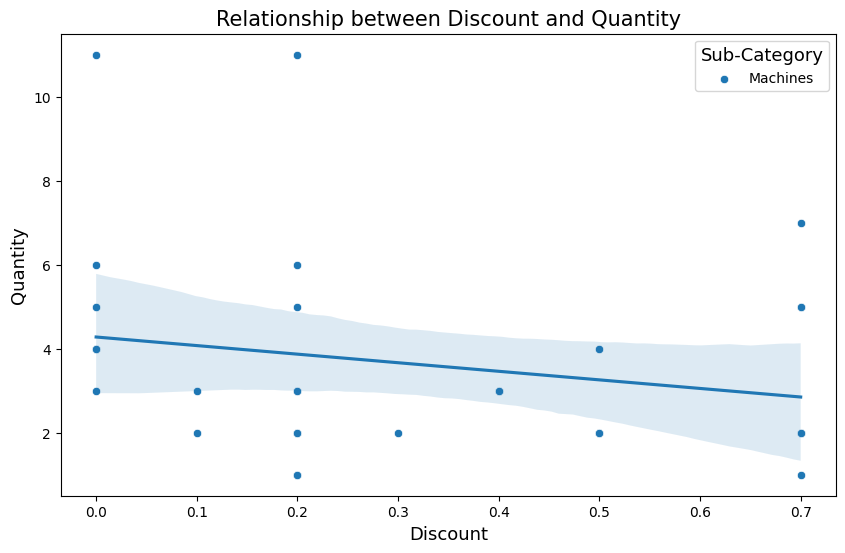

In [70]:
# Machines의 데이터 추출
machines_data = df[df['Sub-Category'] == 'Machines']

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Quantity', data=machines_data, label='Machines')

# 상관관계 선 그리기
sns.regplot(x='Discount', y='Quantity', data=machines_data, scatter=False)

plt.xlabel('Discount', fontsize=13)
plt.ylabel('Quantity', fontsize=13)
plt.title('Relationship between Discount and Quantity', fontsize=15)
plt.legend(title='Sub-Category', fontsize=10, title_fontsize=13)
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [ ]:
# !pip install scikit-learn
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [2]:
import sklearn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#x : Discount / y : Profit
dis_pro = df[['Discount', 'Profit']]

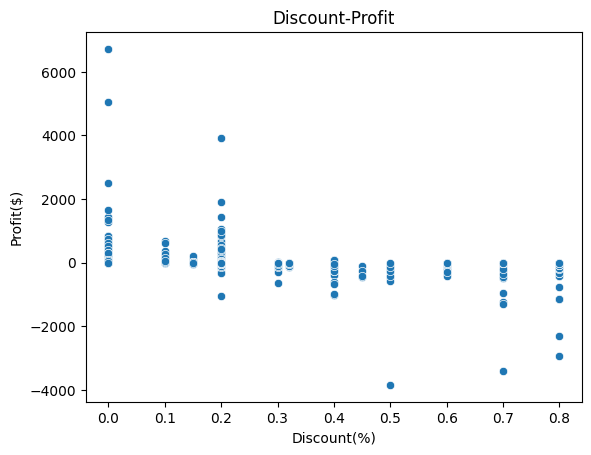

In [11]:
sns.scatterplot(data = dis_pro, x = 'Discount', y = 'Profit')
plt.title('Discount-Profit')
plt.xlabel('Discount(%)')
plt.ylabel('Profit($)')
plt.show()

In [12]:
#선형회귀 훈련(적합)
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

In [13]:
X = df[['Discount']]
y = df[['Profit']]

In [14]:
#데이터 훈련
model_lr.fit(X = X, y = y)

LinearRegression()

In [16]:
#가중치(w1)
print(model_lr.coef_)
#편향(bias, w0)
print(model_lr.intercept_)

[[-254.58961189]]
[68.04731228]


In [17]:
w1 = model_lr.coef_[0][0]
w0 = model_lr.intercept_[0]

In [20]:
#x = Discount와 y = Profit의 선형회귀
print('y = {}x + {}'.format(w1.round(2), w0.round(2)))
#결론 : Discount가 증가할수록 Profit은 감소

y = -254.59x + 68.05


In [23]:
#예측값 - 실제값
#식에 예측값을 넣어 에러값 각각 계산, 양수를 만들기 위해 제곱, 모두 더함(MSE)
#예측값값
df['pred'] = df['Discount'] * w1 + w0
df.head(3)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,pred
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,17.129390
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,68.047312
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,68.047312


In [24]:
#에러
df['error'] = df['Profit'] - df['pred']
df.head(3)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,pred,error
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,17.129390,-8.572590
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,68.047312,131.213288
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,68.047312,-66.319312


In [25]:
#에러 제곱
df['error^2'] = df['error'] ** 2
df.head(3)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,pred,error,error^2
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,17.129390,-8.572590,73.489298
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,68.047312,131.213288,17216.926874
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,68.047312,-66.319312,4398.251181


In [26]:
#MSE
df['error^2'].sum() / len(df)

55692.71711363316

<Axes: xlabel='Discount', ylabel='Profit'>

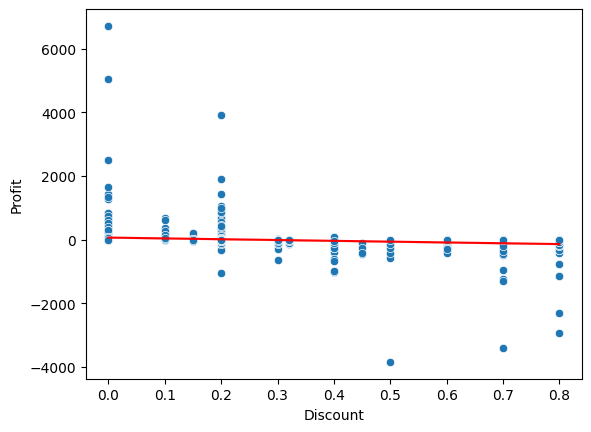

In [29]:
#산점도 그래프에 선형식 만들어서 그래프로 그리기
sns.scatterplot(data = df, x = 'Discount', y = 'Profit')
sns.lineplot(data = df, x = 'Discount', y = 'pred', color = 'red')

In [30]:
#선형회귀 모델 평가
#1.회귀(숫자 맞추는 방법) : MSE(수동계산)
#2.RSqure 값이 평균대비 설명력, 0이면 낮음, 1일수록 높은 것
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
#평가함수는 공통적으로 정답(실제y), 예측값(pred)
y_true = df['Profit']
y_pred = df['pred']
mean_squared_error(y_true, y_pred)

55692.71711363316

In [32]:
r2_score(y_true, y_pred)

0.047673509570754224

In [34]:
y_pred2 = model_lr.predict(df[['Discount']])
y_pred2

array([[17.1293899 ],
       [68.04731228],
       [68.04731228],
       ...,
       [17.1293899 ],
       [17.1293899 ],
       [17.1293899 ]])

In [35]:
mean_squared_error(y_true, y_pred2)

55692.71711363316

In [20]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split

# 데이터 준비
X = df[['Discount']]
y = df['Profit']

# 학습용 데이터와 테스트용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화
model_lr = LinearRegression(fit_intercept=True)  # fit_intercept를 True로 설정하여 편향 사용

# 모델 훈련
model_lr.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model_lr.predict(X_test)

# 성능 평가 - MSE 및 R Square
mse = mean_squared_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R Square:", r_square)


NameError: name 'train_test_split' is not defined

In [3]:

#Ship-mode count
ship_mode_counts = df['Ship Mode'].value_counts()
print(ship_mode_counts)

Ship Mode
Standard Class    1897
Second Class       657
First Class        572
Same Day           186
Name: count, dtype: int64


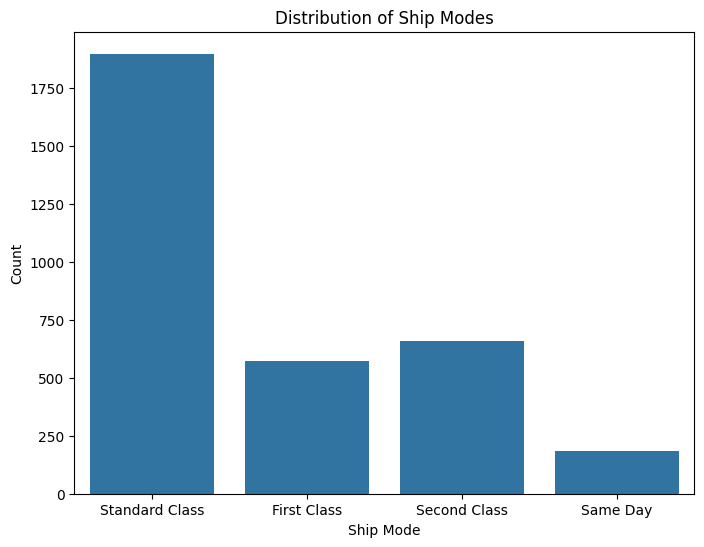

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ship-mode 칼럼의 데이터 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Ship Mode')
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()


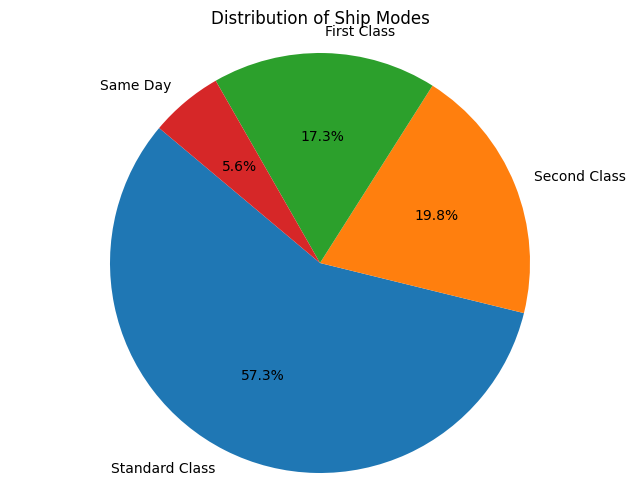

In [4]:
import matplotlib.pyplot as plt

# Ship-mode 칼럼의 데이터 분포 시각화 (파이 차트)
ship_mode_counts = df['Ship Mode'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(ship_mode_counts, labels=ship_mode_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ship Modes')
plt.axis('equal')
plt.show()


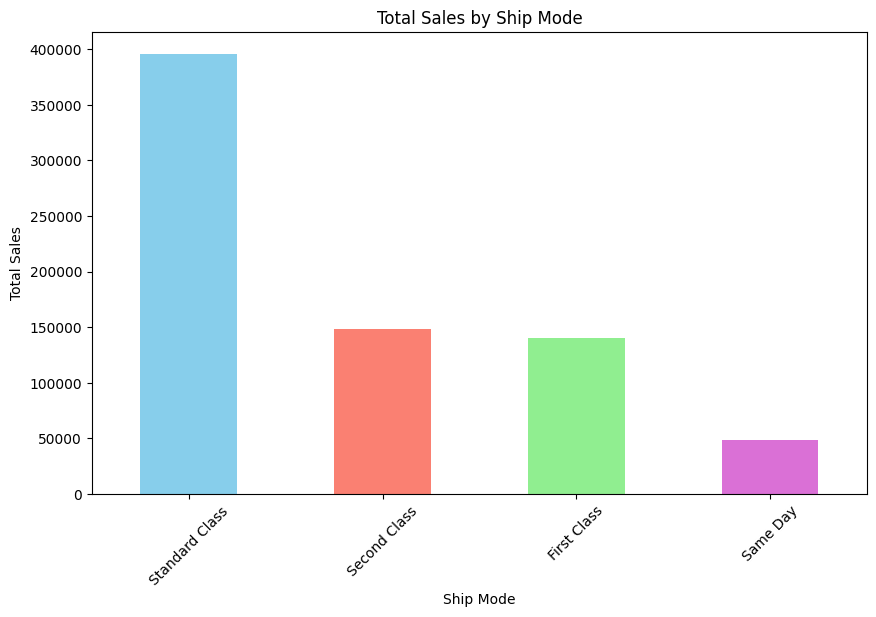

In [8]:
#import matplotlib.pyplot as plt

# Ship Mode별 Sales 합계 계산
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
ship_mode_sales.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orchid'])
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Profit이 0보다 큰 데이터 필터링
filtered_data = df[df['Profit'] > 0]

# 선형 회귀 모델 피팅
model = LinearRegression()
model.fit(filtered_data[['Discount']], filtered_data['Profit'])

# Profit이 0이 되지 않는 Discount 예측
non_zero_profit_discount = (-model.intercept_ / model.coef_)[0]

print("Profit이 0이 되지 않는 Discount:", non_zero_profit_discount)


Profit이 0이 되지 않는 Discount: 0.48189023471329817


In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 데이터 생성 (예시)
data = {
    'Discount': [0.1, 0.2, 0.3, 0.4, 0.5],
    'Profit': [100, 50, 0, -30, -80]
}

df = pd.DataFrame(data)

# 선형 회귀 모델 학습
X = df[['Discount']]
y = df['Profit']

model = LinearRegression()
model.fit(X, y)

# Profit이 0이 되는 Discount 예측
zero_profit_discount = -model.intercept_ / model.coef_[0]

print("Profit이 0이 되는 Discount:", zero_profit_discount)


Profit이 0이 되는 Discount: 0.3181818181818182
